# Applied Machine Learning Assignment

This assignment covers contents of the first three lectures.

We will be focusing on topics related to
1. Data Visualization and Analysis
2. Supervised Learning - Linear Regression, Logistic Regression, and SVM with Data Preprocessing.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.linalg import inv
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import accuracy_score

In [2]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [3]:
pd.options.mode.chained_assignment = None

# Task 1: Data Visualization and Analysis

"Now that's A LOT of data. Can you show me something I can understand?"

This question often arises when we see datasets with thousands of rows and want to understand the characteristics of data. 

Data visualization comes to our rescue!

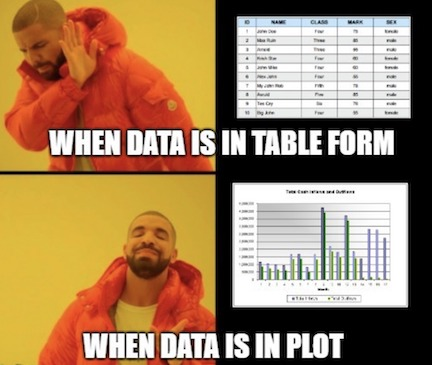


### We are going to use the credit-dataset for Task 1. 

**1.1 Plot the distribution of the features - credit_amount, age, and duration using a histogram.
Make sure to label your axes while plotting. [6 points]**



In [4]:
# reading dataset
df = pd.read_csv('data/dataset_credit.csv',
                 sep=',')
# display first 5 rows
df.head(5)

,duration,credit_amount,savings_status,employment,property_magnitude,age,own_telephone,class
0,6,1169.0,'no known savings','>=7','real estate',67,NaN,good
1,48,5951.0,'<100','1<=X<4','real estate',22,NaN,bad
2,12,2096.0,'<100','4<=X<7','real estate',49,NaN,good
3,42,7882.0,'<100','4<=X<7','life insurance',45,none,good
4,24,4870.0,'<100','1<=X<4','no known property',53,NaN,bad


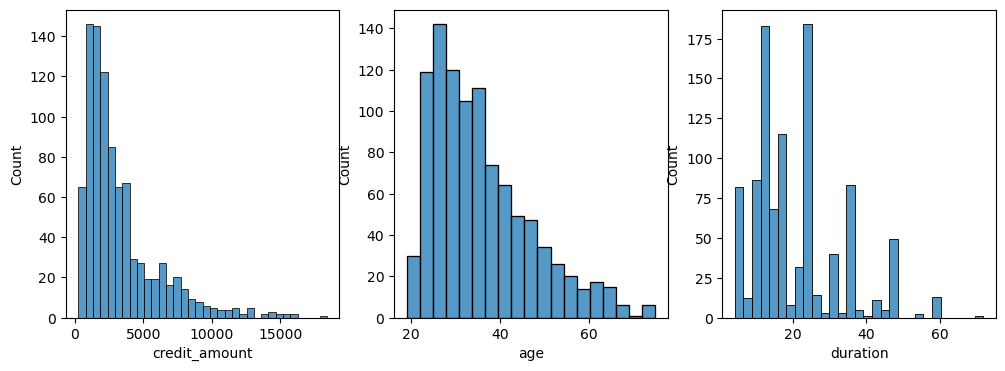

In [5]:
fig,ax = plt.subplots(1,3,figsize=(12,4))
sns.histplot(x=df.credit_amount,ax=ax[0])
sns.histplot(x=df.age,ax=ax[1])
sns.histplot(x=df.duration,ax=ax[2]);

**1.2 Plot the relationships between the features - class and credit_amount using box plots. Make sure to label the axes[4 points]**



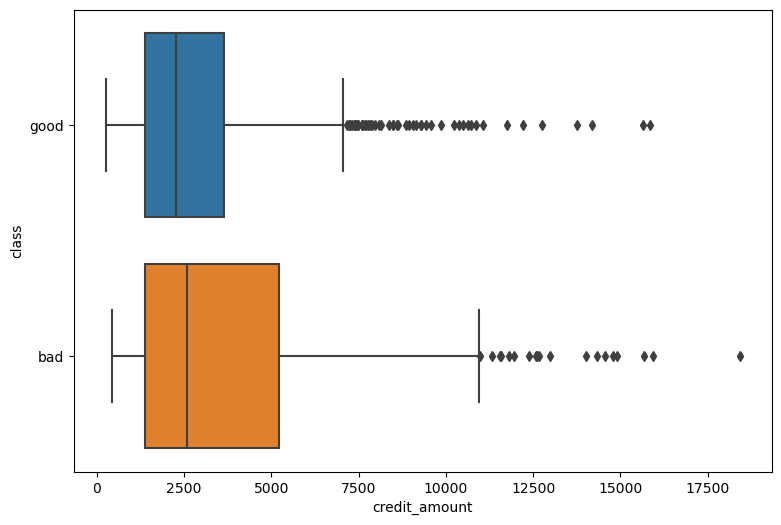

In [6]:
# Your code here
fig,ax = plt.subplots(1,1,figsize=(9,6))
sns.boxplot(x='credit_amount',y='class',data=df);

**1.3 Plot the distribution of label 'class' using a pie chart. Be sure to label correctly. What do you infer about the data and its distribution from all the plots? (1.1, 1.2, and 1.3)[5 points]**

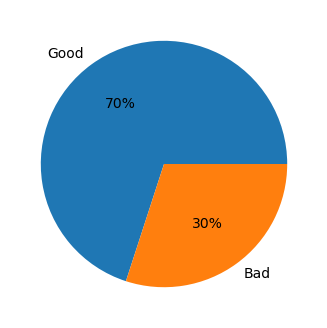

In [7]:
# Your code here
fig,ax = plt.subplots(1,1,figsize=(8,4))
ax.pie(df['class'].value_counts(), labels = ['Good','Bad'], autopct='%.0f%%')
plt.show()

# Task 2 : Linear Models for Regression and Classification

In this notebook, we will be implementing three linear models **linear regression, logistic regression, and SVM**. We will see that despite some of their differences at the surface, these linear models (and many machine learning models in general) are fundamentally doing the same thing - that is, optimizing model parameters to minimize a loss function on data.

## Part 1: Linear Regression

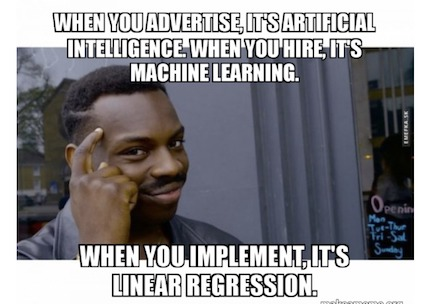

In part 1, we will use two datasets - synthetic and auto-mpg to train and evaluate our linear regression model.

The first dataset will be a synthetic dataset sampled from the following equations:

$ 𝜖 ∼ Normal(0,3) $

$ y = 5𝑥 + 10 + 𝜖 $

In [8]:
np.random.seed(0)
epsilon = np.random.normal(0, 3, 100)
x = np.linspace(0, 10, 100) 
# y = np.linspace(0, 5, 100)
y = 5 * x + 10 + epsilon

To apply linear regression, we need to first check if the assumptions of linear regression are not violated.

Assumptions of Linear Regression:

*   Linearity:  is a linear (technically affine) function of $x$.
*   Independence: the $x$'s are independently drawn, and not dependent on each other.
*   Homoscedasticity: the 𝜖's, and thus the $y$'s, have constant variance.
*   Normality: the 𝜖's are drawn from a Normal distribution (i.e. Normally-distributed errors)

These properties, as well as the simplicity of this dataset, will make it a good test case to check if our linear regression model is working properly.

**2.1.1 Plot y vs x in the synthetic dataset as a scatter plot. Label your axes and make sure your y-axis starts from 0. Do the features have linear relationship?[2 points]**

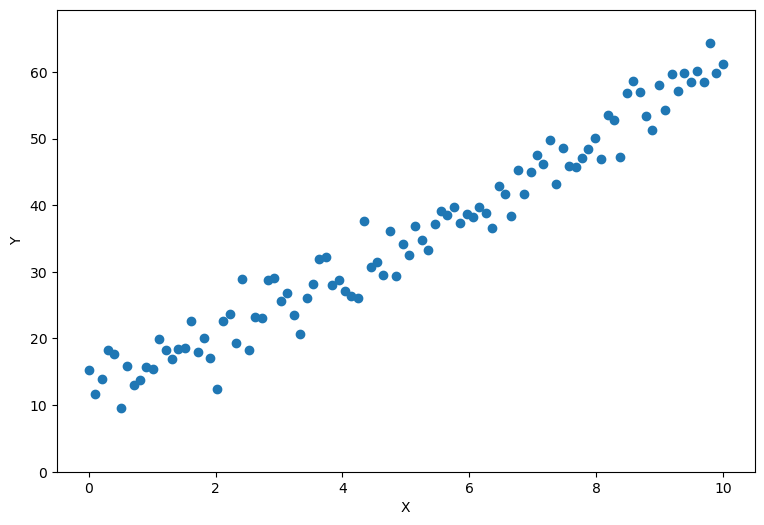

In [9]:
# Your code here
fig,ax = plt.subplots(1,1,figsize=(9,6))

plt.scatter(x,y);
ax.set_xlabel('X');
ax.set_ylabel('Y');
ax.set_ylim(0, max(y)+5);



The second dataset we will be using is an [auto MPG dataset](https://archive.ics.uci.edu/ml/datasets/Auto+MPG). This dataset contains various characteristics for around 400 cars. We will use linear regression to predict the mpg label from seven features (4 continuous, 3 discrete).

In [10]:
# Load auto MPG dataset
auto_mpg_df = pd.read_csv('data/auto-mpg.csv')

# drop some rows with missing entries
auto_mpg_df = auto_mpg_df[auto_mpg_df['horsepower'] != '?']

# Cast horsepower column to float
auto_mpg_df['horsepower'] = auto_mpg_df['horsepower'].astype(float)

auto_mpg_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [11]:
# Split data into features and labels
auto_mpg_X = auto_mpg_df.drop(columns=['mpg'])
auto_mpg_y = auto_mpg_df['mpg']

**2.1.2 Plot the relationships between the label (mpg) and the continuous features (displacement, horsepower, weight, acceleration) using a small multiple of scatter plots. Make sure to label the axes.[4 points]**

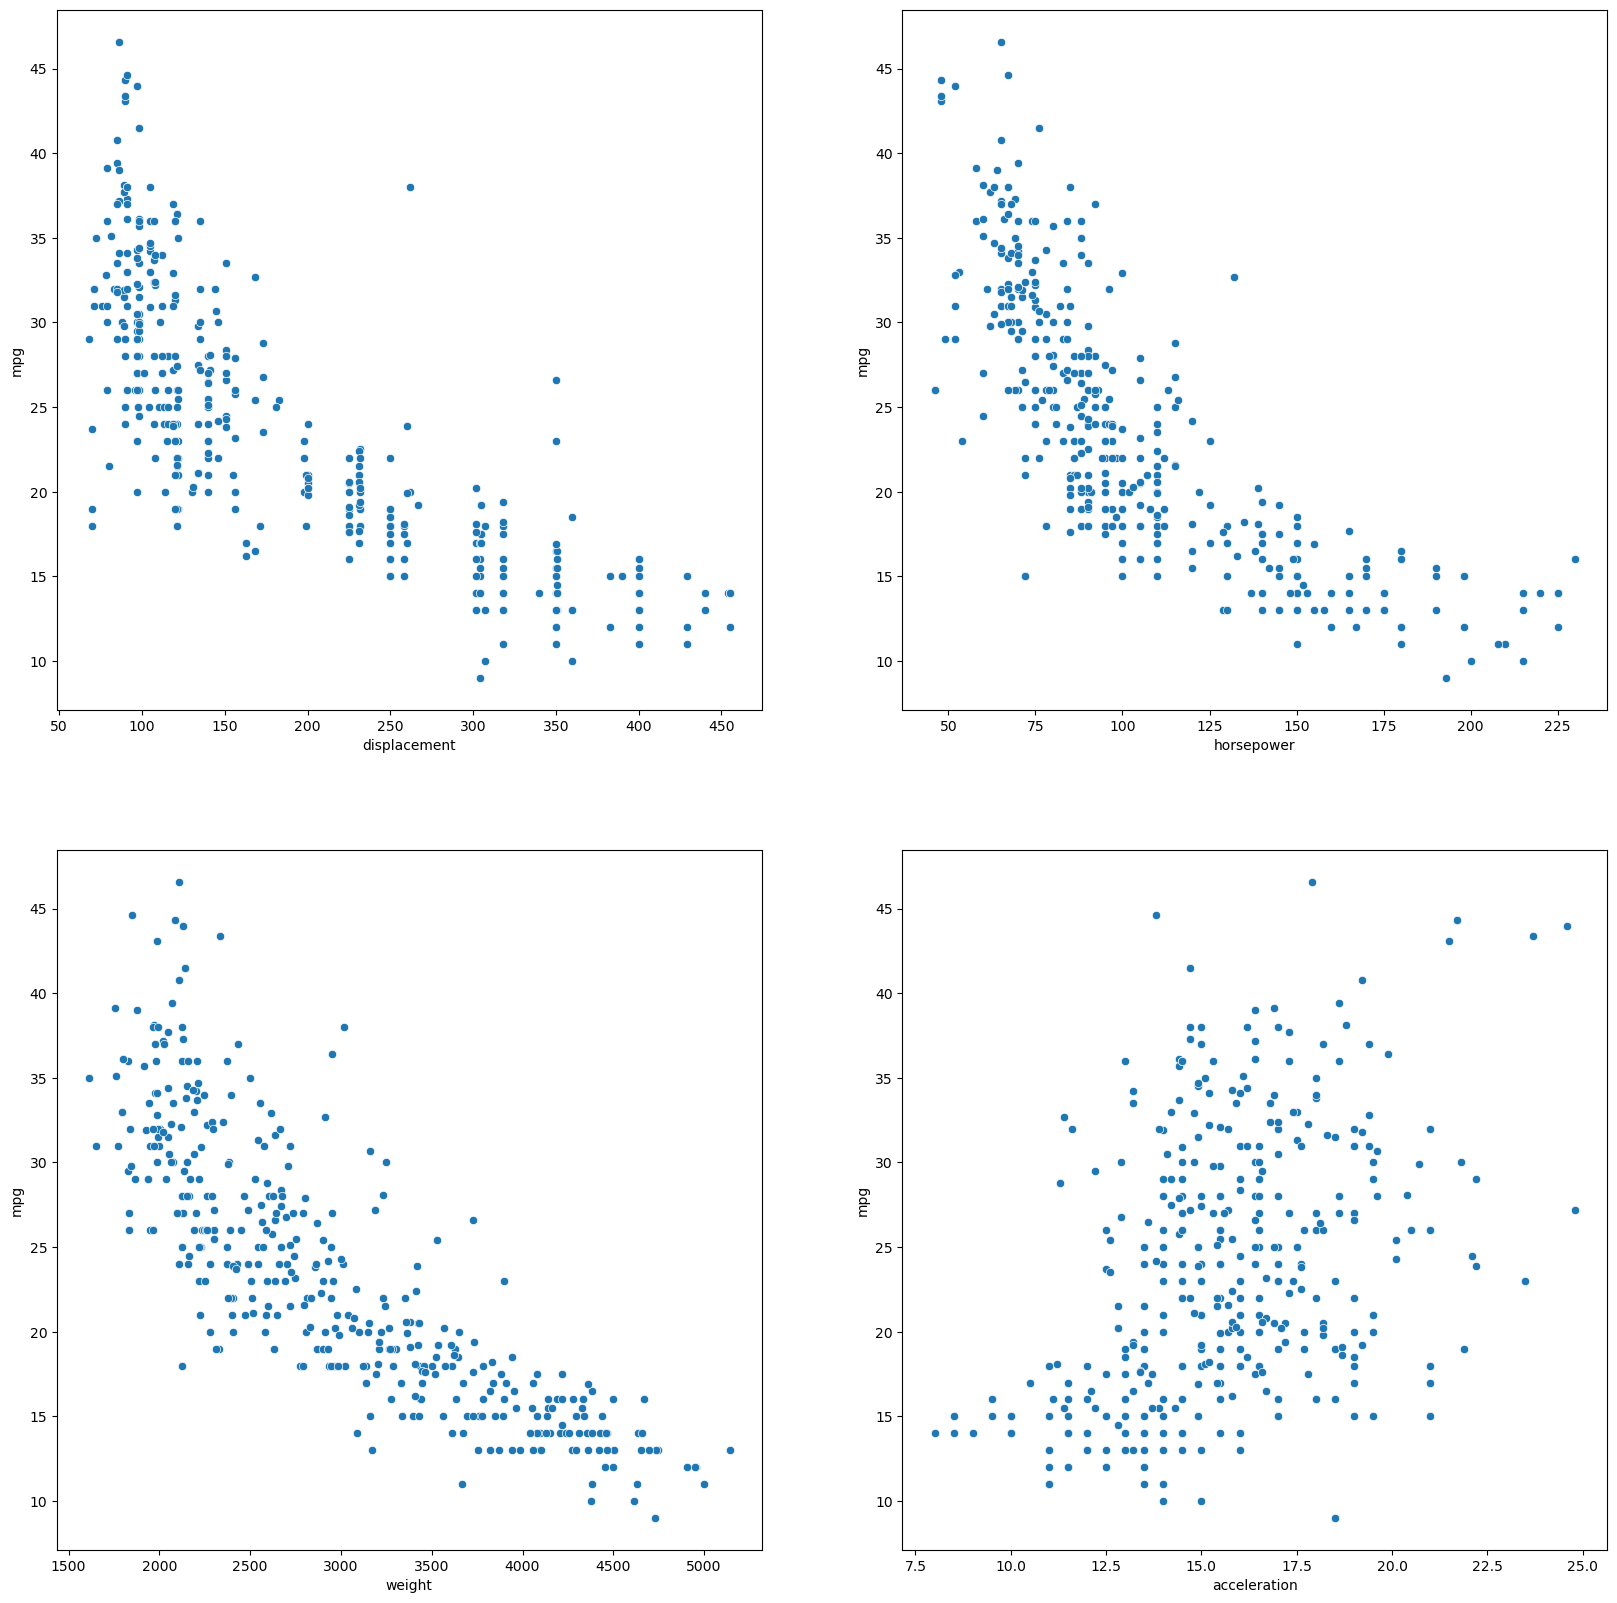

In [12]:
# Your code here
#sns.pairplot(auto_mpg_df[['mpg','displacement','horsepower','weight','acceleration']]);

fig,ax = plt.subplots(2,2,figsize=(20,20))

sns.scatterplot(x='displacement',y='mpg',data=auto_mpg_df,ax=ax[0,0]);
sns.scatterplot(x='horsepower',y='mpg',data=auto_mpg_df,ax=ax[0,1]);
sns.scatterplot(x='weight',y='mpg',data=auto_mpg_df,ax=ax[1,0]);
sns.scatterplot(x='acceleration',y='mpg',data=auto_mpg_df,ax=ax[1,1]);

**2.1.3 Plot the relationships between the label (mpg) and the discrete features (cylinders, model year, origin) using a small multiple of box plots. Make sure to label the axes.[3 points]**

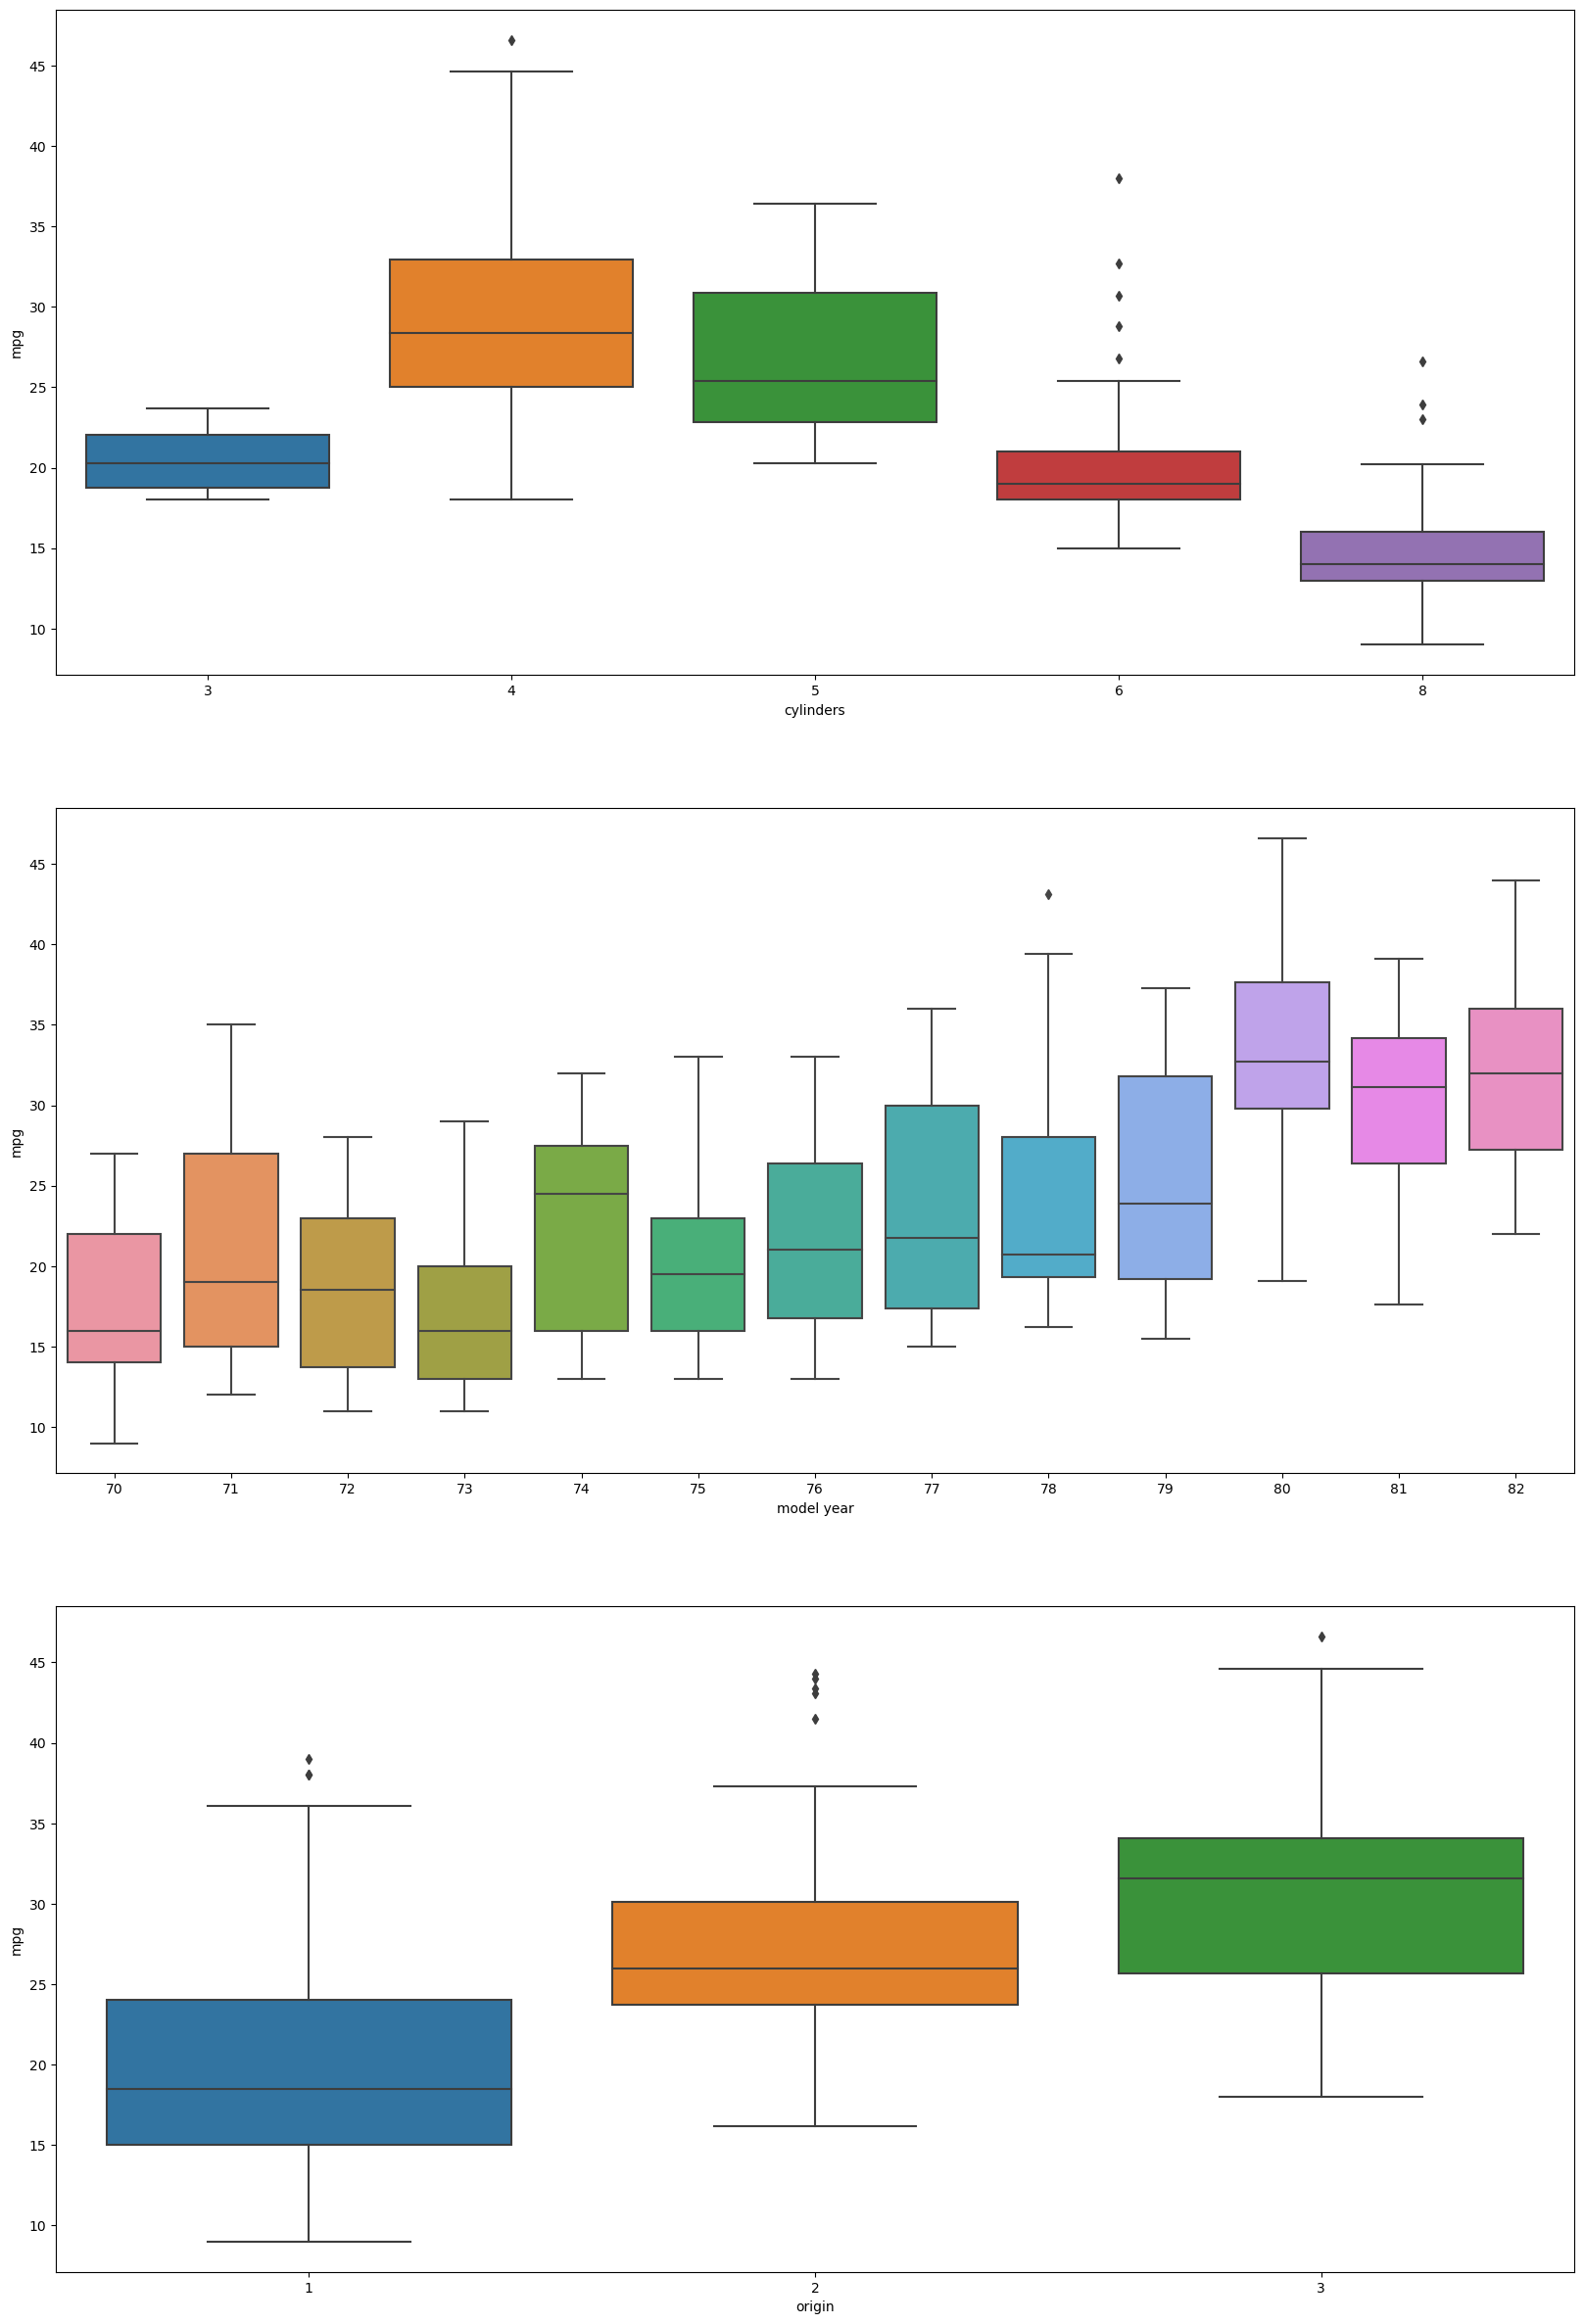

In [13]:
# Your code here
fig,ax = plt.subplots(3,1,figsize=(20,30))
sns.boxplot(x='cylinders', y = 'mpg',data=auto_mpg_df,ax=ax[0]);
sns.boxplot(x='model year', y = 'mpg',data=auto_mpg_df,ax=ax[1]);
sns.boxplot(x='origin', y = 'mpg',data=auto_mpg_df,ax=ax[2]);

**2.1.4 From the visualizations above, do you think linear regression is a good model for this problem? Why and/or why not? Please explain.[2 points]**

Yes, Linear Regression is a good model for this problem because most of features in the dataset like displacement, weight, horsepower vs mpg can be fit in a straight line(this is identified on plotting relationship between mpg and continuous features -displacement, horsepower, weight, acceleration , which shows a clear coorelation between mpg and these features so in such cases linear regression is a good model.


### Data Preprocessing

Before we can fit a linear regression model, there are several pre-processing steps we should apply to the datasets:
1. Encode categorial features appropriately.
2. Split the dataset into training (60%), validation (20%), and test (20%) sets.
3. Standardize the columns in the feature matrices X_train, X_val, and X_test to have zero mean and unit variance. To avoid information leakage, learn the standardization parameters (mean, variance) from X_train, and apply it to X_train, X_val, and X_test.
4. Add a column of ones to the feature matrices X_train, X_val, and X_test. This is a common trick so that we can learn a coefficient for the bias term of a linear model.

The processing steps on the synthetic dataset have been provided for you below as a reference:


In [15]:
X = x.reshape((100, 1))   # Turn the x vector into a feature matrix X

# 1. No categorical features in the synthetic dataset (skip this step)

# 2. Split the dataset into training (60%), validation (20%), and test (20%) sets
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, test_size=0.25, random_state=0)

# 3. Standardize the columns in the feature matrices
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)   # Fit and transform scalar on X_train
X_val = scaler.transform(X_val)           # Transform X_val
X_test = scaler.transform(X_test)         # Transform X_test

# 4. Add a column of ones to the feature matrices
X_train = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
X_val = np.hstack([np.ones((X_val.shape[0], 1)), X_val])
X_test = np.hstack([np.ones((X_test.shape[0], 1)), X_test])

print(X_train[:5], '\n\n', y_train[:5])

[[ 1.          0.53651502]
 [ 1.         -1.00836082]
 [ 1.         -0.72094206]
 [ 1.         -0.25388657]
 [ 1.          0.64429705]] 

 [38.44273829 19.38966655 26.79105322 30.69326568 45.00432104]


**2.1.5 Apply the same processing steps on the auto MPG dataset.[3 points]**

In [16]:
# Your code here
auto_mpg_y = (auto_mpg_y.to_numpy())

# 2. Split the dataset into training (60%), validation (20%), and test (20%) sets
auto_mpg_X_dev, auto_mpg_X_test, auto_mpg_y_dev, auto_mpg_y_test = train_test_split(auto_mpg_X, auto_mpg_y, test_size=0.2, random_state=0)
auto_mpg_X_train, auto_mpg_X_val, auto_mpg_y_train, auto_mpg_y_val = train_test_split(auto_mpg_X_dev, auto_mpg_y_dev, test_size=0.25, random_state=0)

# 3. Standardize the columns in the feature matrices
scaler = StandardScaler()
auto_mpg_X_train = scaler.fit_transform(auto_mpg_X_train)   # Fit and transform scalar on X_train
auto_mpg_X_val = scaler.transform(auto_mpg_X_val)           # Transform X_val
auto_mpg_X_test = scaler.transform(auto_mpg_X_test)         # Transform X_test

# 4. Add a column of ones to the feature matrices
auto_mpg_X_train = np.hstack([np.ones((auto_mpg_X_train.shape[0], 1)), auto_mpg_X_train])
auto_mpg_X_val = np.hstack([np.ones((auto_mpg_X_val.shape[0], 1)), auto_mpg_X_val])
auto_mpg_X_test = np.hstack([np.ones((auto_mpg_X_test.shape[0], 1)), auto_mpg_X_test])

print(auto_mpg_X_train[:5], '\n\n', auto_mpg_y_train[:5])

[[ 1.          0.37998163  0.39492947  0.1100916   0.8241919   0.28262047
  -0.57603817 -0.77559006]
 [ 1.         -0.83804168 -0.97348359 -0.87531843 -1.20346504 -0.54674887
  -0.02809942  0.43433043]
 [ 1.          1.59800495  1.33761402  1.37704734  1.02260224 -1.159761
  -0.85000755 -0.77559006]
 [ 1.         -0.83804168 -0.5173459  -0.48115442 -0.53443504 -0.00585582
   1.34174745 -0.77559006]
 [ 1.         -0.83804168 -0.97348359 -1.49471902 -1.0244118   2.15771638
   1.06777808  0.43433043]] 

 [18.  29.  15.  27.2 44.3]


At the end of this pre-processing, you should have the following vectors and matrices: 
- Syntheic dataset: X_train, X_val, X_test, y_train, y_val, y_test
- Auto MPG dataset: auto_mpg_X_train, auto_mpg_X_val, auto_mpg_X_test, auto_mpg_y_train, auto_mpg_y_val, auto_mpg_y_test

### Implement Linear Regression

Now, we can implement our linear regression model! Specifically, we will be implementing ridge regression, which is linear regression with L2 regularization. Given an (m x n) feature matrix $X$, an (m x 1) label vector $y$, and an (n x 1) weight vector $w$, the hypothesis function for linear regression is:

$$
y = X w
$$

Note that we can omit the bias term here because we have included a column of ones in our $X$ matrix, so the bias term is learned implicitly as a part of $w$. This will make our implementation easier.

Our objective in linear regression is to learn the weights $w$ which best fit the data. This notion can be formalized as finding the optimal $w$ which minimizes the following loss function:

$$
\min_{w} \| X w - y \|^2_2 + \alpha \| w \|^2_2 \\
$$

This is the ridge regression loss function. The $\| X w - y \|^2_2$ term penalizes predictions $Xw$ which are not close to the label $y$. And the $\alpha \| w \|^2_2$ penalizes large weight values, to favor a simpler, more generalizable model. The $\alpha$ hyperparameter, known as the regularization parameter, is used to tune the complexity of the model - a higher $\alpha$ results in smaller weights and lower complexity, and vice versa. Setting $\alpha = 0$ gives us vanilla linear regression.

Conveniently, ridge regression has a closed-form solution which gives us the optimal $w$ without having to do iterative methods such as gradient descent. The closed-form solution, known as the Normal Equations, is given by:

$$
w = (X^T X + \alpha I)^{-1} X^T y
$$

**2.1.6 Implement a `LinearRegression` class with two methods: `train` and `predict`.[8 points]**
You may NOT use sklearn for this implementation. You may, however, use `np.linalg.solve` to find the closed-form solution. It is highly recommended that you vectorize your code.

In [19]:
class LinearRegression():
    '''
    Linear regression model with L2-regularization (i.e. ridge regression).

    Attributes
    ----------
    alpha: regularization parameter
    w: (n x 1) weight vector
    '''
    
    def __init__(self, alpha=0):
        self.alpha = alpha
        self.w = None

    def train(self, X, y):
        '''Trains model using ridge regression closed-form solution 
        (sets w to its optimal value).
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        None
        '''
        
        wq = inv(X.transpose().dot(X) + self.alpha*np.identity(X.shape[1])).dot(X.transpose()).dot(y)
        self.w = wq
       
            
        
    def predict(self, X):
        '''Predicts on X using trained model.
        
        Parameters
        ----------
        X : (m x n) feature matrix
        
        Returns
        -------
        y_pred: (m x 1) prediction vector
        '''
        
        y_pred = X.dot(self.w)
        return y_pred
        

### Train,  Evaluate, and Interpret Linear Regression Model

**2.1.7 Using your `LinearRegression` implementation above, train a vanilla linear regression model ($\alpha = 0$) on (X_train, y_train) from the synthetic dataset. Use this trained model to predict on X_test. Report the first 3 and last 3 predictions on X_test, along with the actual labels in y_test.[3 points]**

In [20]:
d = LinearRegression(0)
d.train(X_train, y_train)
y_pred_train = d.predict(X_train)
y_pred_val = d.predict(X_val)
y_pred_test = d.predict(X_test)

print('First Three predictions and labels:')
for i in range(3):
    print(f'Y predict= {y_pred_test[i]:0.3f} , Y label = {y_test[i]: 0.3f}' )
    
print('\nLast Three predictions and labels:')
for i in [-3,-2,-1]:
    print(f'Y predict= {y_pred_test[i]:0.3f} , Y label = {y_test[i]: 0.3f}' )

First Three predictions and labels:
Y predict= 23.297 , Y label =  23.269
Y predict= 53.014 , Y label =  56.971
Y predict= 11.410 , Y label =  13.946

Last Three predictions and labels:
Y predict= 22.306 , Y label =  28.930
Y predict= 26.764 , Y label =  20.724
Y predict= 14.382 , Y label =  13.731


**2.1.8 Plot a scatter plot of y_test vs X_test (just the non-ones column). Then, using the weights from the trained model above, plot the best-fit line for this data on the same figure.[2 points]** If your line goes through the data points, you have likely implemented the linear regression correctly!

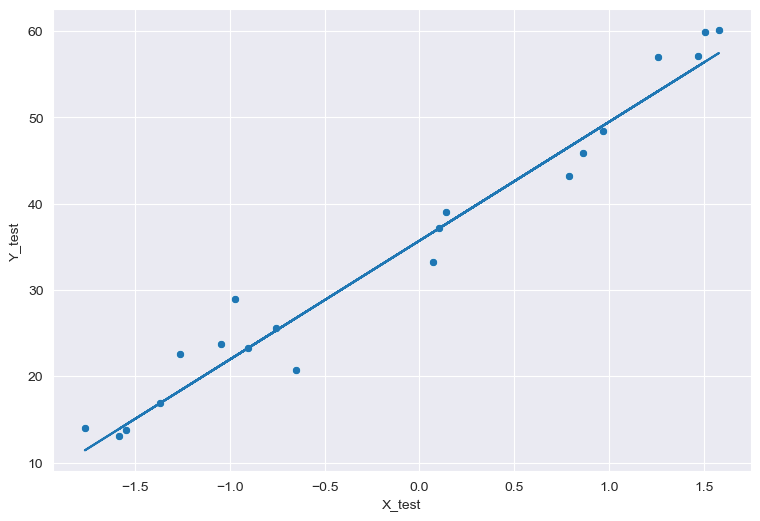

In [21]:
x_predict = X_test[:,1];
y_hat = d.w[1]*X_test[:,1] + d.w[0];

sns.set_style('darkgrid')
fig,ax = plt.subplots(1,1,figsize=(9,6))
ax = sns.scatterplot(x=X_test[:,1],y=y_test);
ax.set_xlabel('X_test')
ax.set_ylabel('Y_test')
ax.plot(x_predict,y_hat);

**2.1.9 Train a linear regression model ($\alpha = 0$) on the auto MPG training data. Make predictions and report the mean-squared error (MSE) on the training, validation, and test sets. Report the first 3 and last 3 predictions on the test set, along with the actual labels.[4 points]**

In [26]:
d = LinearRegression(0)
d.train(auto_mpg_X_train,auto_mpg_y_train)
y_pred_train = d.predict(auto_mpg_X_train)
y_pred_val = d.predict(auto_mpg_X_val)
y_pred_test = d.predict(auto_mpg_X_test)


print('First Three predictions and labels:')
for i in range(3):
    print(f'Y predict= {y_pred_test[i]:0.3f} , Y label = {auto_mpg_y_test[i]: 0.3f}' )
    
print('\nLast Three predictions and labels:')
for i in [-3,-2,-1]:
    print(f'Y predict= {y_pred_test[i]:0.3f} , Y label = {auto_mpg_y_test[i]: 0.3f}' )

First Three predictions and labels:
Y predict= 3.269 , Y label =  1.204
Y predict= 3.208 , Y label =  1.133
Y predict= 2.511 , Y label =  0.910

Last Three predictions and labels:
Y predict= 3.256 , Y label =  1.181
Y predict= 2.975 , Y label =  1.083
Y predict= 3.460 , Y label =  1.238


In [27]:
print(f'MSE on training data is:{sum((y_pred_train-auto_mpg_y_train)**2)/len(auto_mpg_X_train): 0.4f}')
print(f"MSE on validation data is:{sum((y_pred_val-auto_mpg_y_val)**2)/len(auto_mpg_y_val): 0.4f}")
print(f"MSE on test data is: {sum((y_pred_test-auto_mpg_y_test)**2)/len(auto_mpg_y_test): 0.4f}")

MSE on training data is: 0.0132
MSE on validation data is: 0.0180
MSE on test data is:  3.8838


**2.1.10 As a baseline model, use the mean of the training labels (auto_mpg_y_train) as the prediction for all instances. Report the mean-squared error (MSE) on the training, validation, and test sets using this baseline. [3 points]** This is a common baseline used in regression problems and tells you if your model is any good. Your linear regression MSEs should be much lower than these baseline MSEs.

In [28]:
baseline_value = np.mean(auto_mpg_y_train)
print(f"Baseline MSE on training data is: {sum((auto_mpg_y_train-baseline_value)**2)/len(auto_mpg_y_train): 0.4f}")
print(f"Baseline MSE on validation data is: {sum((auto_mpg_y_val-baseline_value)**2)/len(auto_mpg_y_val): 0.4f}")
print(f"Baseline MSE on test data is: {sum((auto_mpg_y_test-baseline_value)**2)/len(auto_mpg_y_test): 0.4f}")

Baseline MSE on training data is:  0.1117
Baseline MSE on validation data is:  0.1246
Baseline MSE on test data is:  3.9943


**2.1.11 Interpret your model trained on the auto MPG dataset using a bar chart of the model weights. [3 points]** Make sure to label the bars (x-axis) and don't forget the bias term!

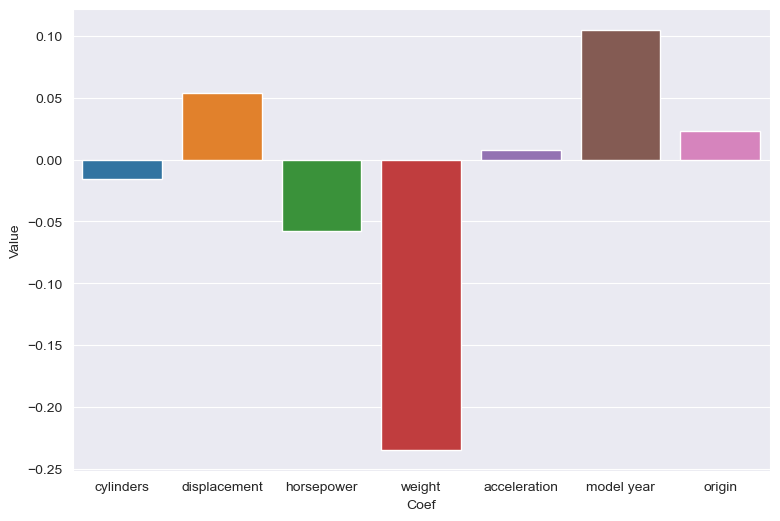

In [29]:
coef = pd.DataFrame({'Value':d.w[1:],
                     'Coef': auto_mpg_X.columns    
})


fig,ax = plt.subplots(1,1,figsize=(9,6))

sns.barplot(x='Coef', y='Value', data=coef);


**2.1.12 According to your model, which features are the greatest contributors to the MPG?[2 points]**

In [30]:

print("Weight has the greatest contributors to the MPG")

Weight has the greatest contributors to the MPG


### Tune Regularization Parameter $\alpha$

Now, let's do ridge regression and tune the $\alpha$ regularization parameter on the auto MPG dataset.

**2.1.13 Sweep out values for $\alpha$ using alphas = np.logspace(-5, 1, 20. Perform a grid search over these $\alpha$ values, recording the training and validation MSEs for each $\alpha$. A simple grid search is fine, no need for k-fold cross validation. Plot the training and validation MSEs as a function of $\alpha$ on a single figure. Make sure to label the axes and the training and validation MSE curves. Use a log scale for the x-axis.[4 points]**

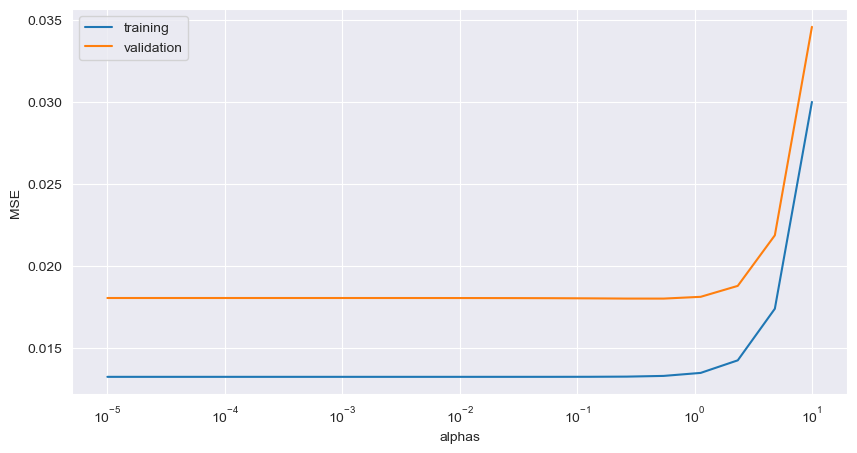

In [31]:
alphas = np.logspace(-5,1,20)
t_mse = []
v_mse = []
for x in alphas:
    d = LinearRegression(x)
    d.train(auto_mpg_X_train,auto_mpg_y_train)
    y_pred_train = d.predict(auto_mpg_X_train)
    y_pred_val = d.predict(auto_mpg_X_val)
    t_mse.append(sum((auto_mpg_y_train-y_pred_train)**2)/len(auto_mpg_y_train))
    v_mse.append(sum((auto_mpg_y_val-y_pred_val)**2)/len(auto_mpg_y_val))
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,1,1)
plt.plot(alphas,t_mse,label="training")
plt.plot(alphas,v_mse,label='validation')
plt.legend()
ax1.set_xlabel("alphas");
ax1.set_ylabel("MSE");
ax1.set_xscale('log')
plt.show()

**2.1.14 Explain your plot above. How do training and validation MSE behave with decreasing model complexity (increasing $\alpha$)?[ 2 points]**

Training and Validation MSE behaviour pattern is very similiar with Train data having lesser MSE compared to the validation data by 0.05.

Till alpha=4-5, the MSE is very less, but after that threshold the MSE increases largely for both Train and Validation data.


## Part 2: Logistic Regression

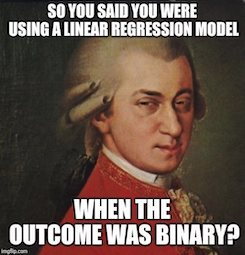






**In this part we would use Logistic Regression on NBA rookie stats to predict if player will last 5 years in league**

Class variable represent:
y = 0 if career years played < 5
y = 1 if career years played >= 5


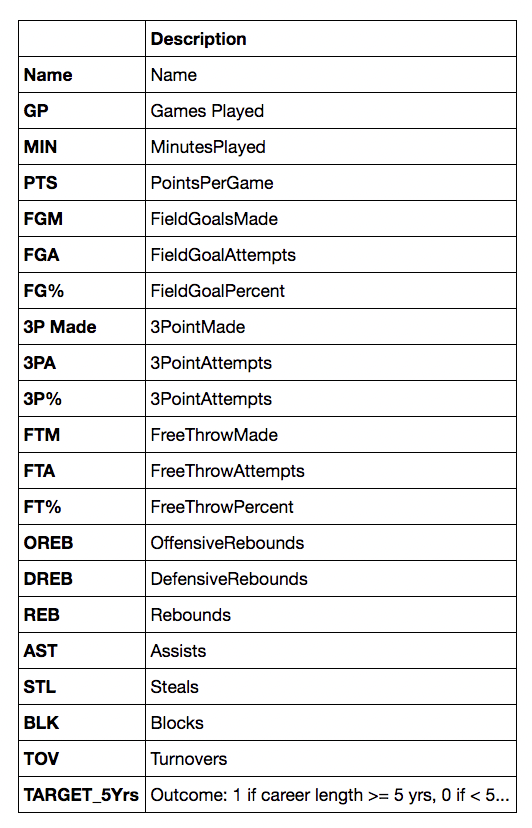

In [33]:
nba_reg = pd.read_csv("data/nba_logreg.csv")
nba_reg.head()
print(nba_reg.shape)
nba_reg.head(5)

(1340, 21)


,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


#### Missing Value analysis

**2.2.1 Are there any missing values in the dataset? If so, what can be done about it? (Think if removing is an option?)
(Note: Name your dataset as nba_reg_new after removing NAs) [2 points]**

In [34]:
# Check if there are missing values in the dataset
print(f'nans per column: {nba_reg.isna().sum()}')

nans per column: Name            0
GP              0
MIN             0
PTS             0
FGM             0
FGA             0
FG%             0
3P Made         0
3PA             0
3P%            11
FTM             0
FTA             0
FT%             0
OREB            0
DREB            0
REB             0
AST             0
STL             0
BLK             0
TOV             0
TARGET_5Yrs     0
dtype: int64


In [35]:
nba_reg_new = nba_reg.dropna()

In [36]:
nba_reg_new.shape

(1329, 21)

In [37]:
nba_reg_new['TARGET_5Yrs'].unique()

array([0., 1.])

**2.2.2 Do you think that the distribution of labels is balanced? Why/why not? 
Hint: Find the probability of the different categories.[3 points]**

In [41]:
prob_0 = nba_reg_new['TARGET_5Yrs'].value_counts()[0]/ nba_reg_new['TARGET_5Yrs'].count()
print(f"Probability of 0 = {prob_0:0.3f}")

prob_1 = nba_reg_new['TARGET_5Yrs'].value_counts()[1]/ nba_reg_new['TARGET_5Yrs'].count()
print(f"Probability of 1 = {prob_1:0.3f}")

Probability of 0 = 0.378
Probability of 1 = 0.622


In [39]:
nba_X = nba_reg_new.drop(columns=['TARGET_5Yrs'])
nba_y = nba_reg_new['TARGET_5Yrs']
print(nba_X.shape)

(1329, 20)


**2.2.3 Plot the correlation matrix, and check if there is high correlation between the given numerical features (Threshold >=0.9). If yes, drop those highly correlated features from the dataframe. Why is necessary to drop those columns before proceeding further?[4 points]**

C:\Users\Zeus\AppData\Local\Temp\ipykernel_7004\3537149979.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  top = corr_mat.where(np.triu(np.ones(corr_mat.shape), k=1).astype(np.bool))


[]


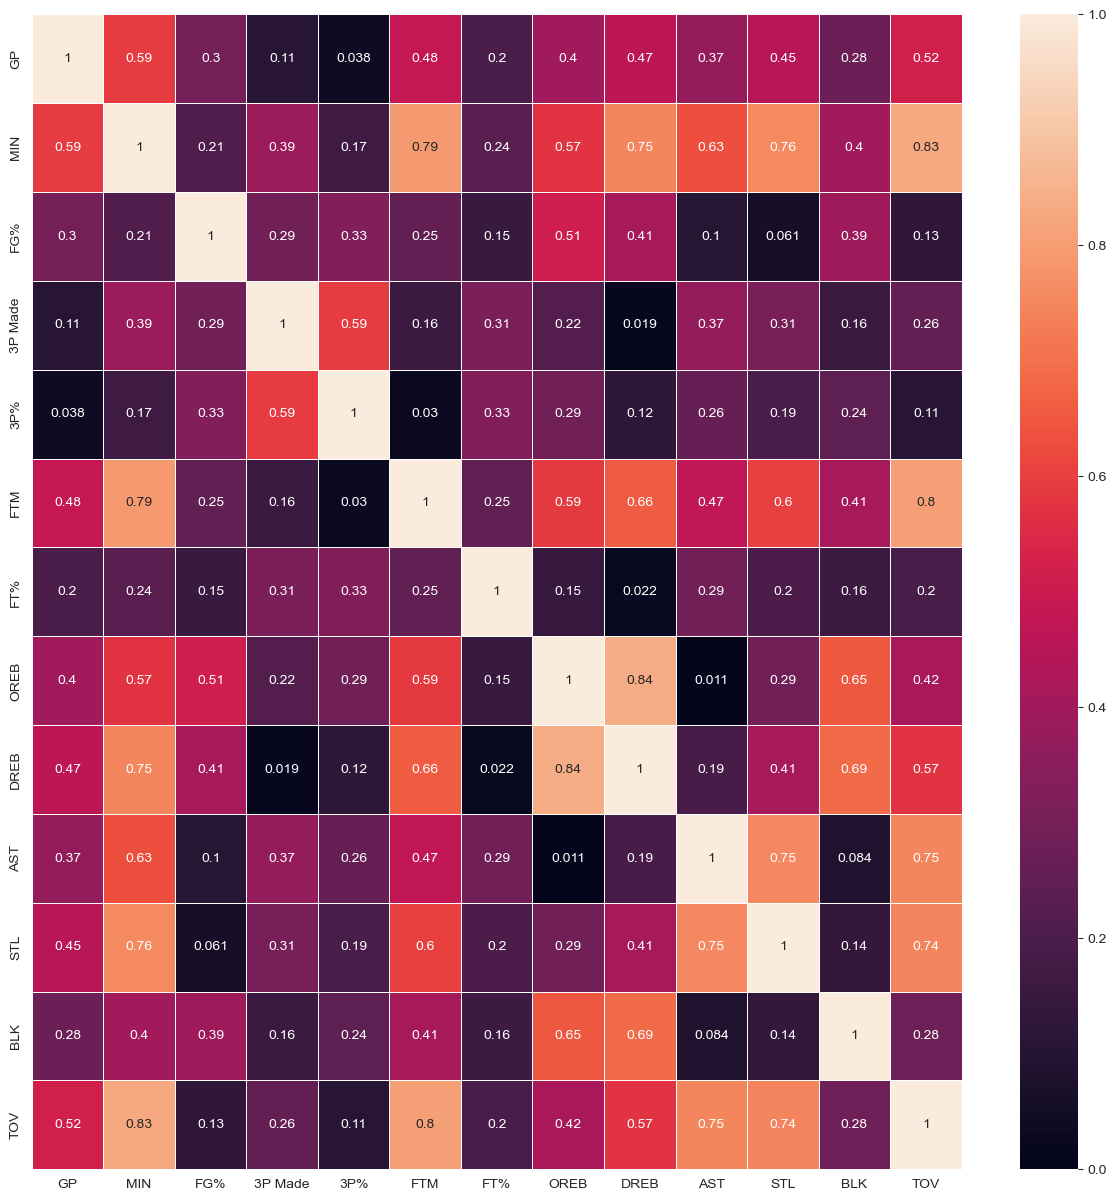

In [44]:
# Creating the correlation matrix
cont_features = nba_reg_new.drop(columns=['Name', 'TARGET_5Yrs'], axis=1)    
corr_mat = cont_features.corr().abs()
# print(corr_mat.shape)
# Select upper triangle of correlation matrix
top = corr_mat.where(np.triu(np.ones(corr_mat.shape), k=1).astype(np.bool))

#Plotting the correlation matrix 
plt.figure(figsize=(15,15))
sns.heatmap(corr_mat, annot= True, vmin= 0, linewidth=0.5)


# Finding features with correlation greater than 0.90
to_drop = [feature for feature in top.columns if any(top[feature] >= 0.90)]
print(to_drop)

# # Drop features 
nba_reg_new = nba_reg_new.drop(to_drop, axis=1)

In [45]:
nba_reg_new.shape

(1329, 15)

**Separating Features & Y variable from the processed dataset**

**Please note to replace the dataframe below with the new dataframe created after removing highly correlated features**

In [46]:
# Split data into features and labels

nba_new_X = nba_reg_new.drop(columns=['TARGET_5Yrs', 'Name'])
nba_new_Y = nba_reg_new['TARGET_5Yrs']
print(nba_new_X.columns)

Index(['GP', 'MIN', 'FG%', '3P Made', '3P%', 'FTM', 'FT%', 'OREB', 'DREB',
       'AST', 'STL', 'BLK', 'TOV'],
      dtype='object')


**2.2.4 Apply the following pre-processing steps:[5 points]**

1) Use OrdinalEncoding to encode the label in the dataset (male & female)

2) Convert the label from a Pandas series to a Numpy (m x 1) vector. If you don't do this, it may cause problems when implementing the logistic regression model.

3)Split the dataset into training (60%), validation (20%), and test (20%) sets.

4) Standardize the columns in the feature matrices. To avoid information leakage, learn the standardization parameters from training, and then apply training, validation and test dataset.

5) Add a column of ones to the feature matrices of train, validation and test dataset. This is a common trick so that we can learn a coefficient for the bias term of a linear model.

In [47]:
from sklearn.pipeline import make_pipeline

nba_new_Y = np.array(nba_new_Y).reshape(-1,1)

#Split the dataset into training (60%), validation (20%), and test (20%) sets
X_dev, X_test, y_dev, y_test = train_test_split(nba_new_X, nba_new_Y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(nba_new_X, nba_new_Y, test_size=0.2, random_state=42)

imputer = make_pipeline(StandardScaler())

X_train = imputer.fit_transform(X_train, y = y_train)
train_new = np.ones((X_train.shape[0], 1))
X_train = np.hstack((X_train, train_new))

X_val = imputer.transform(X_val)
val_new = np.ones((X_val.shape[0], 1))
X_val = np.hstack((X_val, val_new))

X_test = imputer.transform(X_test)
test_new = np.ones((X_test.shape[0], 1))
X_test = np.hstack((X_test, test_new))

feature_list = nba_new_X.columns.values.tolist()
feature_list.extend(['bias'])
print(feature_list)

['GP', 'MIN', 'FG%', '3P Made', '3P%', 'FTM', 'FT%', 'OREB', 'DREB', 'AST', 'STL', 'BLK', 'TOV', 'bias']


### Implement Logistic Regression

We will now implement logistic regression with L2 regularization. Given an (m x n) feature matrix $X$, an (m x 1) label vector $y$, and an (n x 1) weight vector $w$, the hypothesis function for logistic regression is:

$$
y = \sigma(X w)
$$

where $\sigma(x) = \frac{1}{1 + e^{-x}}$, i.e. the sigmoid function. This function scales the prediction to be a probability between 0 and 1, and can then be thresholded to get a discrete class prediction.

Just as with linear regression, our objective in logistic regression is to learn the weights $𝑤$ which best fit the data. For L2-regularized logistic regression, we find an optimal $w$ to minimize the following loss function:

$$
\min_{w} \ -y^T \ \text{log}(\sigma(Xw)) \ - \  (\mathbf{1} - y)^T \ \text{log}(\mathbf{1} - \sigma(Xw)) \ + \ \alpha \| w \|^2_2 \\
$$

Unlike linear regression, however, logistic regression has no closed-form solution for the optimal $w$. So, we will use gradient descent to find the optimal $w$. The (n x 1) gradient vector $g$ for the loss function above is:

$$
g = X^T \Big(\sigma(Xw) - y\Big) + 2 \alpha w
$$

Below is pseudocode for gradient descent to find the optimal $w$. You should first initialize $w$ (e.g. to a (n x 1) zero vector). Then, for some number of epochs $t$, you should update $w$ with $w - \eta g $, where $\eta$ is the learning rate and $g$ is the gradient. You can learn more about gradient descent [here](https://www.coursera.org/lecture/machine-learning/gradient-descent-8SpIM).

> $w = \mathbf{0}$
> 
> $\text{for } i = 1, 2, ..., t$
>
> $\quad \quad w = w - \eta g $


**A LogisticRegression class with five methods: train, predict, calculate_loss, calculate_gradient, and calculate_sigmoid has been implemented for you below.**

In [48]:
class LogisticRegression():
    '''
    Logistic regression model with L2 regularization.

    Attributes
    ----------
    alpha: regularization parameter
    t: number of epochs to run gradient descent
    eta: learning rate for gradient descent
    w: (n x 1) weight vector
    '''
    
    def __init__(self, alpha=0, t=100, eta=1e-3):
        self.alpha = alpha
        self.t = t
        self.eta = eta
        self.w = None

    def train(self, X, y):
        '''Trains logistic regression model using gradient descent 
        (sets w to its optimal value).
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        losses: (t x 1) vector of losses at each epoch of gradient descent
        '''
        
        loss = list()
        self.w = np.zeros((X.shape[1],1))
        for i in range(self.t): 
            self.w = self.w - (self.eta * self.calculate_gradient(X, y))
            loss.append(self.calculate_loss(X, y))
        return loss
        
    def predict(self, X):
        '''Predicts on X using trained model. Make sure to threshold 
        the predicted probability to return a 0 or 1 prediction.
        
        Parameters
        ----------
        X : (m x n) feature matrix
        
        Returns
        -------
        y_pred: (m x 1) 0/1 prediction vector
        '''
        y_pred = self.calculate_sigmoid(X.dot(self.w))
        y_pred[y_pred >= 0.5] = 1
        y_pred[y_pred < 0.5] = 0
        return y_pred
    
    def calculate_loss(self, X, y):
        '''Calculates the logistic regression loss using X, y, w, 
        and alpha. Useful as a helper function for train().
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        loss: (scalar) logistic regression loss
        '''
        return -y.T.dot(np.log(self.calculate_sigmoid(X.dot(self.w)))) - (1-y).T.dot(np.log(1-self.calculate_sigmoid(X.dot(self.w)))) + self.alpha*np.linalg.norm(self.w, ord=2)**2
    
    def calculate_gradient(self, X, y):
        '''Calculates the gradient of the logistic regression loss 
        using X, y, w, and alpha. Useful as a helper function 
        for train().
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        gradient: (n x 1) gradient vector for logistic regression loss
        '''
        return X.T.dot(self.calculate_sigmoid( X.dot(self.w)) - y) + 2*self.alpha*self.w        
            
    
    def calculate_sigmoid(self, x):
        '''Calculates the sigmoid function on each element in vector x. 
        Useful as a helper function for predict(), calculate_loss(), 
        and calculate_gradient().
        
        Parameters
        ----------
        x: (m x 1) vector
        
        Returns
        -------
        sigmoid_x: (m x 1) vector of sigmoid on each element in x
        '''
        return (1)/(1 + np.exp(-x.astype('float')))

**2.2.6 Plot Loss over Epoch and Search the space randomly to find best hyperparameters.[6 points]**

A: Using your implementation above, train a logistic regression model **(alpha=0, t=100, eta=1e-3)** on the voice recognition training data. Plot the training loss over epochs. Make sure to label your axes. You should see the loss decreasing and start to converge.[2 points] 

B: Using **alpha between (0,1), eta between(0, 0.001) and t between (0, 100)[ 3 points]**, find the best hyperparameters for LogisticRegression. You can randomly search the space 20 times to find the best hyperparameters.

C. Compare accuracy on the test dataset for both the scenarios.[1 point]

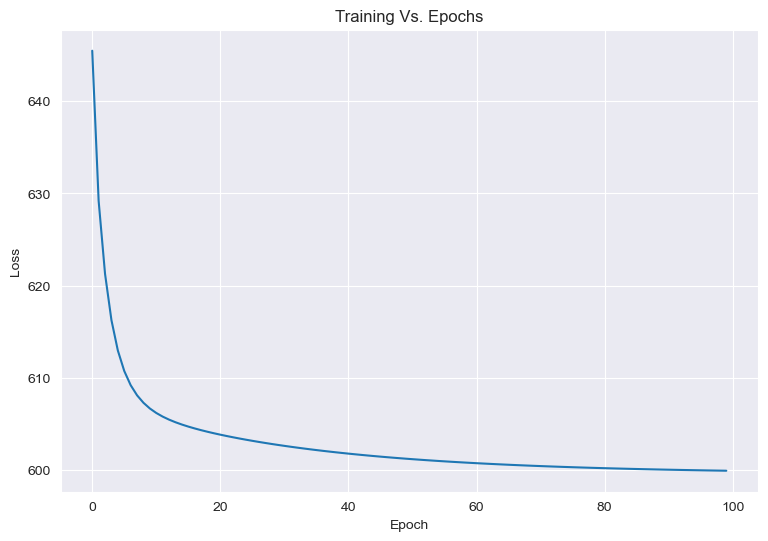

In [49]:
# Your code here 
from sklearn.metrics import accuracy_score
logisticRegression = LogisticRegression(alpha=0, t=100, eta=1e-3)
loss = logisticRegression.train(X_train, y_train)
accuracy = accuracy_score(y_test, logisticRegression.predict(X_test))
fig = plt.figure(figsize = (9,6))
ax = sns.lineplot( x=range(100), y= np.asarray(loss).reshape(100,).astype(float))
plt.title("Training Vs. Epochs")
ax.set_ylabel("Loss")
ax.set_xlabel("Epoch")
plt.show()


In [51]:
t_value = np.random.randint(0,100,50)
alphas = np.random.rand(20)
eta = np.random.rand(20)/1000

loss_list = []
pred_list = []

for i in range(20):
    logisticRegression = LogisticRegression(alphas[i],t_value[i],eta[i])
    total_loss = logisticRegression.train(X_train, y_train)
    loss = logisticRegression.calculate_loss(X_val, y_val)
    y_pred_new = logisticRegression.predict(X_val)
    loss_list.append(loss)
    pred_list.append(y_pred_new)
    
best_t = t_value[np.argmin(loss_list)]
best_alpha = alphas[np.argmin(loss_list)]
best_eta = eta[np.argmin(loss_list)]

log_reg_best = LogisticRegression(best_alpha,best_t,best_eta)
loss = log_reg_best.train(X_train, y_train)
acc = accuracy_score(y_test, log_reg_best.predict(X_test))

print (f"Scenario 1 Accuracy = {accuracy:0.3f}")
print (f"Scenario 2 Accuracy = {acc:0.3f}")
print ("Best t = ", best_t)
print (f"Best alpha = {best_alpha:0.3f}")
print (f"Best eta = {best_eta:0.3f}")

Scenario 1 Accuracy = 0.729
Scenario 2 Accuracy = 0.737
Best t =  71
Best alpha = 0.026
Best eta = 0.001


### Feature Importance

**2.2.7 Interpret your trained model using a bar chart of the model weights. Make sure to label the bars (x-axis) and don't forget the bias term![2 points]**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'GP'),
  Text(1, 0, 'MIN'),
  Text(2, 0, 'FG%'),
  Text(3, 0, '3P Made'),
  Text(4, 0, '3P%'),
  Text(5, 0, 'FTM'),
  Text(6, 0, 'FT%'),
  Text(7, 0, 'OREB'),
  Text(8, 0, 'DREB'),
  Text(9, 0, 'AST'),
  Text(10, 0, 'STL'),
  Text(11, 0, 'BLK'),
  Text(12, 0, 'TOV'),
  Text(13, 0, 'bias')])

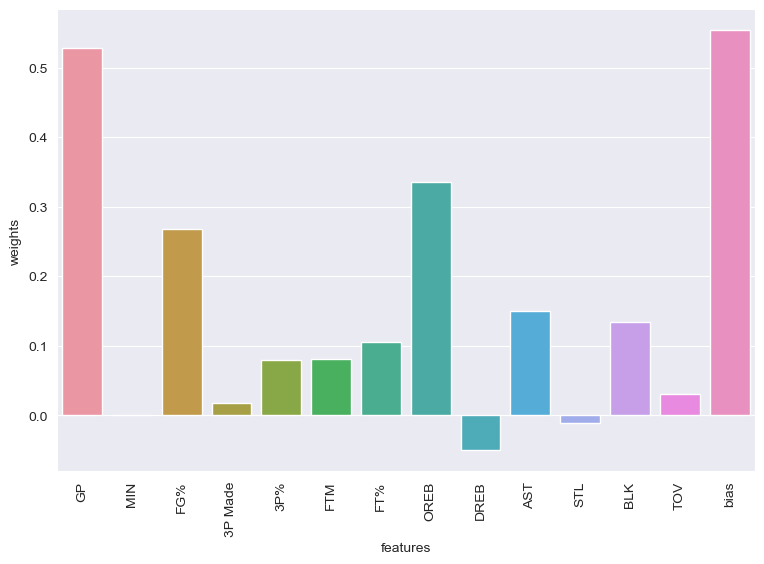

In [52]:
fig = plt.figure(figsize = (9,6))

weight = []
for i in logisticRegression.w:
    weight.append(i[0])
    
df = pd.DataFrame({'features': feature_list, 'weights':weight})
ax = sns.barplot(x = 'features', y = 'weights',data = df)
plt.xticks(rotation=90)


# **Part 3: Support Vector Machines**

In this part, we will be using a breast cancer dataset for classification. 

Given 30 continuous features describing the nuclei of cells in a digitized image of a fine needle aspirate (FNA) of a breast mass, we will train SVM models to classify each sample as benign (B) or malignant (M).

In [59]:
cancer_df = pd.read_csv('data/breast-cancer.csv')
cancer_df = cancer_df.drop(columns=['id', 'Unnamed: 32'])
cancer_df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [60]:
# Split data into features and labels

cancer_X = cancer_df.drop(columns=['diagnosis'])
cancer_y = cancer_df['diagnosis']

**The following pre-processing steps have been applied to the breast cancer dataset in the next cell:**

1. Encode the categorical label as 0 (B) or 1 (M).
2. Convert the label from a Pandas series to a Numpy (m x 1) vector. If you don't do this, it may cause problems when implementing the logistic regression model (certain broadcasting operations may fail unexpectedly).
2. Split the dataset into training (60%), validation (20%), and test (20%) sets.
3. Standardize the columns in the feature matrices cancer_X_train, cancer_X_val, and cancer_X_test to have zero mean and unit variance. To avoid information leakage, learn the standardization parameters (mean, variance) from cancer_X_train, and apply it to cancer_X_train, cancer_X_val, and cancer_X_test.
4. Add a column of ones to the feature matrices cancer_X_train, cancer_X_val, and cancer_X_test. This is a common trick so that we can learn a coefficient for the bias term of a linear model.


In [62]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

cancer_df['diagnosis'] = cancer_df.diagnosis.astype("category").cat.codes
cancer_y_enc = cancer_df['diagnosis'].to_numpy()
cancer_y_enc = cancer_y_enc.reshape(cancer_y_enc.shape[0],1)
print(cancer_y_enc.shape)
print(type(cancer_y_enc))


cancer_X_dev, cancer_X_test, cancer_y_dev, cancer_y_test = train_test_split(cancer_X, cancer_y_enc, test_size=0.2, random_state=0)
cancer_X_train, cancer_X_val, cancer_y_train, cancer_y_val = train_test_split(cancer_X_dev, cancer_y_dev, test_size=0.25, random_state=0)


scaler = StandardScaler()
cancer_X_train = scaler.fit_transform(cancer_X_train) 
cancer_X_val = scaler.transform(cancer_X_val)
cancer_X_test = scaler.transform(cancer_X_test)


cancer_X_train = np.hstack([np.ones((cancer_X_train.shape[0], 1)), cancer_X_train])
cancer_X_val = np.hstack([np.ones((cancer_X_val.shape[0], 1)), cancer_X_val])
cancer_X_test = np.hstack([np.ones((cancer_X_test.shape[0], 1)), cancer_X_test])


(569, 1)
<class 'numpy.ndarray'>


### Train Primal SVM
**3.1 Train a primal SVM (with default parameters) on the breast cancer training data. Make predictions and report the accuracy on the training, validation, and test sets.[5 points]**

In [64]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC

primal_svm = LinearSVC(tol=0.0001, C=1.0, dual = False )
primal_svm.fit(cancer_X_train,cancer_y_train)

acc_predit_train = accuracy_score(primal_svm.predict(cancer_X_train),cancer_y_train)
acc_predit_val = accuracy_score(primal_svm.predict(cancer_X_val),cancer_y_val)
acc_predit_test = accuracy_score(primal_svm.predict(cancer_X_test),cancer_y_test)


print(f"Accuracy of Training data: {acc_predit_train:0.3}")
print(f"Accuracy of Validation data: {acc_predit_val:0.3f}")
print(f"Accuracy of Testing data: {acc_predit_test:0.3f}")

Accuracy of Training data: 0.991
Accuracy of Validation data: 0.930
Accuracy of Testing data: 0.947


C:\Users\Zeus\anaconda3\envs\Python_Proj\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Train Dual SVM
**3.2 Train a dual SVM (with default parameters) on the breast cancer training data. Make predictions and report the accuracy on the training, validation, and test sets.[5 points]**

In [65]:
from sklearn.svm import SVC

dual_svm = SVC(C=1, kernel = "linear")
dual_svm.fit(cancer_X_train,cancer_y_train)

acc_predit_train = accuracy_score(dual_svm.predict(cancer_X_train),cancer_y_train)
acc_predit_val = accuracy_score(dual_svm.predict(cancer_X_val),cancer_y_val)
acc_predit_test = accuracy_score(dual_svm.predict(cancer_X_test),cancer_y_test)

print(f"Accuracy of Training data: {acc_predit_train:0.3}")
print(f"Accuracy of Validation data: {acc_predit_val:0.3f}")
print(f"Accuracy of Testing data: {acc_predit_test:0.3f}")

Accuracy of Training data: 0.991
Accuracy of Validation data: 0.947
Accuracy of Testing data: 0.965


C:\Users\Zeus\anaconda3\envs\Python_Proj\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
